# Data exploration: Train-jpg
Based on the notebook from [Jesus Martinez Manso and Benjamin Goldenberg](https://www.kaggle.com/robinkraft/getting-started-with-the-data-now-with-docs)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import misc
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from scipy import ndimage
from IPython.display import display
%matplotlib inline

## First: exploring the labels

In [2]:
train_csv = os.path.join("./Data", 'train.csv')

In [3]:
labels_df = pd.read_csv(train_csv)
labels_df.tail()

,image_name,tags
40474,train_40474,clear primary
40475,train_40475,cloudy
40476,train_40476,agriculture clear primary
40477,train_40477,agriculture clear primary road
40478,train_40478,agriculture cultivation partly_cloudy primary


In [4]:
# Build list with unique labels
label_list = []
for tag_str in labels_df.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)

In [5]:
# Add onehot features for every label
for label in label_list:
    labels_df[label] = labels_df['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
# Display head
labels_df.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [6]:
# Histogram of label instances
labels_df[label_list].sum().sort_values()

blow_down               98
conventional_mine      100
slash_burn             209
blooming               332
artisinal_mine         339
selective_logging      340
bare_ground            859
cloudy                2330
haze                  2695
habitation            3662
cultivation           4477
partly_cloudy         7251
water                 7262
road                  8076
agriculture          12338
clear                28203
primary              37840
dtype: int64

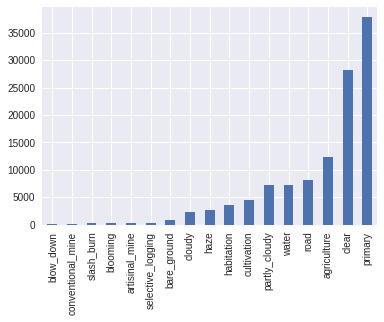

In [7]:
# Histogram of label instances
labels_df[label_list].sum().sort_values().plot.bar()

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
haze,2695,2668,672,0,613,129,394,202,3,0,0,2,41,5,4,5,0
primary,2668,37840,11990,27668,7057,3471,7733,4455,209,331,7173,94,683,324,332,340,98
agriculture,672,11990,12338,9150,2718,2737,6036,3377,119,24,2492,24,225,38,32,65,22
clear,0,27668,9150,28203,5277,3090,6295,3527,173,0,0,70,744,307,311,308,85
water,613,7057,2718,5277,7262,915,2127,868,24,85,1287,26,206,299,16,49,3
habitation,129,3471,2737,3090,915,3662,2787,895,41,2,441,36,163,29,4,13,3
road,394,7733,6036,6295,2127,2787,8076,1294,36,5,1382,59,323,110,10,151,2
cultivation,202,4455,3377,3527,868,895,1294,4477,126,0,748,4,89,18,35,58,8
slash_burn,3,209,119,173,24,41,36,126,209,0,33,0,10,0,2,2,2
cloudy,0,331,24,0,85,2,5,0,0,2330,0,0,0,0,0,0,0


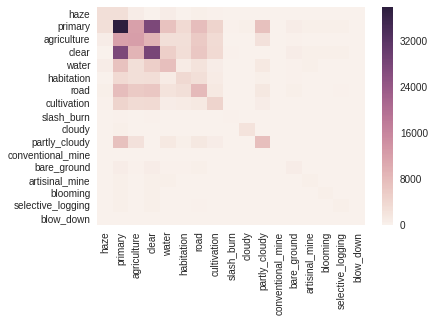

In [8]:
def make_cooccurence_matrix(labels):
    numeric_df = labels_df[labels]; 
    c_matrix = numeric_df.T.dot(numeric_df)
    sns.heatmap(c_matrix)
    return c_matrix
    
# Compute the co-ocurrence matrix
make_cooccurence_matrix(label_list)

Each image should have exactly one weather label:

,clear,partly_cloudy,haze,cloudy
clear,28203,0,0,0
partly_cloudy,0,7251,0,0
haze,0,0,2695,0
cloudy,0,0,0,2330


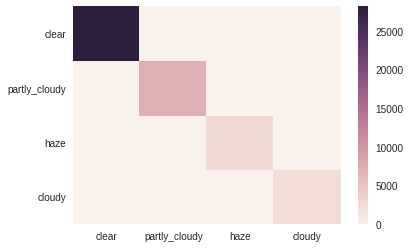

In [9]:
weather_labels = ['clear', 'partly_cloudy', 'haze', 'cloudy']
make_cooccurence_matrix(weather_labels)

But the land labels may overlap:

,primary,agriculture,water,cultivation,habitation
primary,37840,11990,7057,4455,3471
agriculture,11990,12338,2718,3377,2737
water,7057,2718,7262,868,915
cultivation,4455,3377,868,4477,895
habitation,3471,2737,915,895,3662


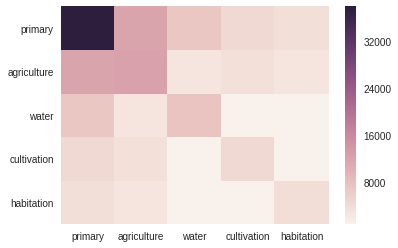

In [10]:
land_labels = ['primary', 'agriculture', 'water', 'cultivation', 'habitation']
make_cooccurence_matrix(land_labels)

The rarer labels have very little overlap:

,slash_burn,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
slash_burn,209,0,10,0,2,2,2
conventional_mine,0,100,10,4,0,0,0
bare_ground,10,10,859,40,3,13,4
artisinal_mine,0,4,40,339,0,6,0
blooming,2,0,3,0,332,7,1
selective_logging,2,0,13,6,7,340,1
blow_down,2,0,4,0,1,1,98


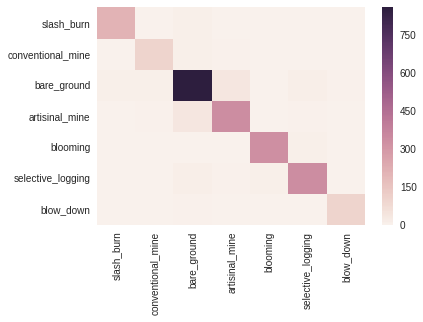

In [11]:
rare_labels = [l for l in label_list if labels_df[label_list].sum()[l] < 2000]
make_cooccurence_matrix(rare_labels)

## Second: inspect images
Let's display an image and visualize the pixel values. Here we will pick an image, load every single single band,
then create RGB stack. These raw images are 16-bit (from 0 to 65535), and contain red, green, blue, and [Near infrared (NIR)](https://en.wikipedia.org/wiki/Infrared#Regions_within_the_infrared) channels. In this example, we are discarding the NIR band just to simplify the steps to visualize the image. However, you should probably keep it for ML classification.

**JPG files have 4 channels but the fourth channel have only zeros!!!**

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 40478 + 1) instead
  if __name__ == '__main__':


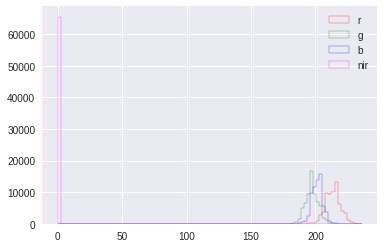

In [12]:
random_int = np.random.random_integers(0,40478)
image_path = os.path.join("./Data", "train-jpg")
image_path = os.path.join(image_path, "train_" + str(random_int) + ".jpg")
rgbn_image = misc.imread(image_path)
rgb_image = rgbn_image[:,:,:3]
r, g, b, nir = rgbn_image[:, :, 0], rgbn_image[:, :, 1], rgbn_image[:, :, 2], rgbn_image[:, :, 3]
for slice_, name, color in ((r,'r', 'red'),(g,'g', 'green'),(b,'b', 'blue'), (nir, 'nir', 'magenta')):
    plt.hist(slice_.ravel(), bins=100, 
             range=[0,rgb_image.max()], 
             label=name, color=color, histtype='step')
plt.legend()


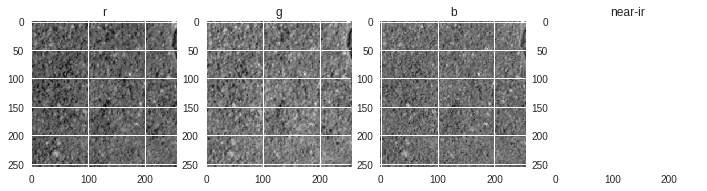

In [13]:
fig = plt.figure()
fig.set_size_inches(12, 4)
for i, (x, c) in enumerate(((r, 'r'), (g, 'g'), (b, 'b'), (nir, 'near-ir'))):
    a = fig.add_subplot(1, 4, i+1)
    a.set_title(c)
    plt.imshow(x)

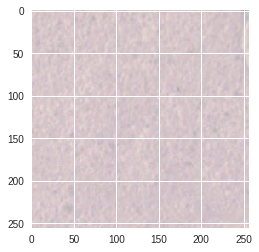

In [14]:
plt.imshow(rgb_image)

** The same histogram without the fourth channel ** 

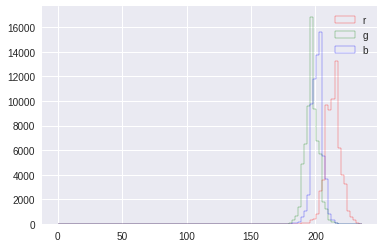

In [15]:
for slice_, name, color in ((r,'r', 'red'),(g,'g', 'green'),(b,'b', 'blue')):
    plt.hist(slice_.ravel(), bins=100, 
             range=[0,rgb_image.max()], 
             label=name, color=color, histtype='step')
plt.legend()